## Q5

Write a program which generates a Poisson spike train over this time interval with a particular mean firing
rate (use time bins of size 1 ms). For now set the mean firing rate to be 20 Hz. Note that the easiest way
to do this is to use the defining property of a Poisson spike train: that the probability of a spike occurring in
each time bin is constant, if the time bin is sufficiently small. That is, the probability of a spike in each 1ms
window is 20Hz/1000ms = 0.02. Plot an example of the spike train produced.

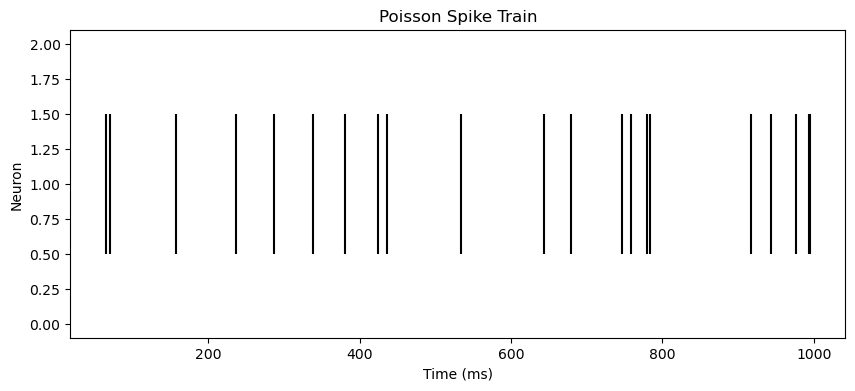

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Time parameters
total_time_sec = 1   # total time in seconds
bin_size_ms = 1      # bin size in milliseconds
total_bins = int(total_time_sec * 1000 / bin_size_ms)  # total number of bins

# Spike train parameters
mean_rate_hz = 20    # mean firing rate in Hz
prob_spike = mean_rate_hz / 1000  # probability of a spike in each bin

# # Generate the spike train using uniform distribution
spike_train = np.random.rand(total_bins) < prob_spike  # Boolean array: True where there's a spike, False otherwise

# Generate the spike train using binomial distribution
# spike_train = (np.random.binomial(1, prob_spike, total_bins)).astype(bool)

# Generate corresponding time array
time = np.arange(total_bins) * bin_size_ms  # Time array in milliseconds. 1- target value

# Plot the spike train
plt.figure(figsize=(10, 4))
plt.eventplot(time[spike_train], color='black')  # Only plot the times where there was a spike
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.title('Poisson Spike Train')
plt.show()

## Q6

Now extend your program so that it produces a set of spike trains for 1000, one second long presentations
of this same stimulus. (That is, add an extra dimension encoding stimulus presentation number to your
spike train array.) Note, for this question, you only need to hand in your code.

In [14]:
# Number of presentations
num_presentations = 1000

# # Generate the spike trains for multiple presentations
spike_trains = np.random.rand(num_presentations, total_bins) < prob_spike  # Boolean array: True where there's a spike, False otherwise

# Generate the spike trains using binomial distribution
# spike_trains = np.random.binomial(1, spike_prob, (num_presentations, n_bins))

# Calculate the number of spikes in each presentation
num_spikes = np.sum(spike_trains, axis=1)

# Calculate spike counts through time
spike_counts = np.sum(spike_trains, axis=0)

### ISI Distribution possibility from 1000 trials for this neuro in 1000ms.

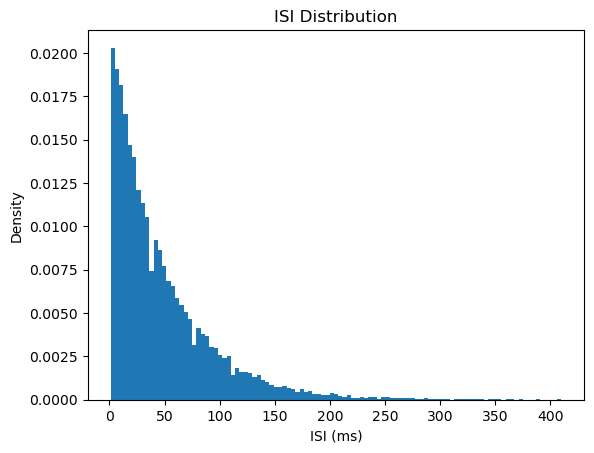

In [15]:
# Suppose spike_trains is your 1000x1000 binary array
# spike_trains = np.random.choice([0, 1], size=(1000, 1000))

ISIs = []

# Iterate over trials
for trial in range(spike_trains.shape[1]):
    # Get the spike times for this trial
    spike_times = np.where(spike_trains[:, trial] == 1)[0]
    
    if len(spike_times) > 1:
        # Calculate the differences between consecutive spike times
        trial_ISIs = np.diff(spike_times)

        # Append these ISIs to the overall list
        ISIs.extend(trial_ISIs)

# Convert the list to a numpy array for easier manipulation
ISIs = np.array(ISIs)

# Plot the histogram of ISIs
plt.hist(ISIs, bins='auto', density=True)
plt.xlabel('ISI (ms)')
plt.ylabel('Density')
plt.title('ISI Distribution')
plt.show()

## Q7

Calculate the number of spikes in each of the 1000 presentations of this stimulus. Plot a histogram of
these data with a bin of width 1 ranging from 0 to the maximum number of spikes.

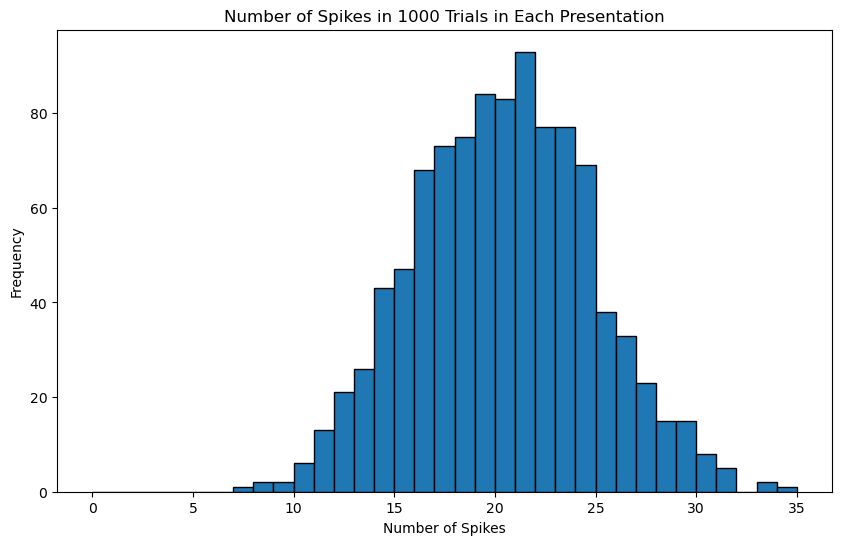

In [16]:
num_spikes = np.sum(spike_trains, axis=1)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(num_spikes, bins=np.arange(0, np.max(num_spikes) + 2), edgecolor='black')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.title('Number of Spikes in 1000 Trials in Each Presentation')
plt.show()

## Q8

Calculate the Fano Factor for this set of 1000 spike trains. Do you get roughly the expected answer?

In [17]:
import numpy as np

# Calculate the mean and variance of spike counts
mean_spikes = np.mean(num_spikes)
var_spikes = np.var(num_spikes)

# Calculate the Fano Factor
fano_factor = var_spikes / mean_spikes

print("Mean number of spikes:", mean_spikes)
print("Variance of spike counts:", var_spikes)
print("Fano Factor:", fano_factor)


Mean number of spikes: 19.929
Variance of spike counts: 19.393959
Fano Factor: 0.9731526418786693


Conclusion: I have got the roughly expected answer.